IMPORTING NECCCESARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os
from google.colab import files


UPLOADING THE DATASET


In [ ]:
import pandas as pd
pd.read_csv('partydata.csv')
df = pd.read_csv('partydatafinal.csv')
print(df)
print(df.shape)
print(df.describe())
print(df.info())


Checking for Null Values

In [ ]:
# Check for missing values
data = pd.read_csv('partydatafinal.csv')
print(data.isnull().sum())


ID               0
Gender           0
Location         0
Age              0
Attendance       0
Interest         0
Sociality        0
Study_hours      0
Academics        0
Marital          0
Living_Status    0
Class_Size       0
Invited          0
dtype: int64


REMOVING DUPLICATE VALUES

In [ ]:
# Check for duplicates
print(data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

print(data.duplicated().sum())  # Verify that duplicates are removed


0
0


ENCODING THE CATEGORICAL VALEUS

In [ ]:
# Identify categorical features
cat_features = ['Gender', 'Marital', 'Living_Status']

# Use OneHotEncoder to convert categorical features to numerical
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(data[cat_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cat_features))

# Drop original categorical columns and concatenate encoded columns
data = data.drop(cat_features, axis=1)
data = pd.concat([data, encoded_df], axis=1)

print(data.head())  # Check the updated DataFrame


   ID   Location  Age  Attendance  Interest  Sociality  Study_hours  \
0   1  14.724697   29           1         3         11            2   
1   2  49.791569   29           7         1         13           30   
2   3  34.846253   22           6         6          8           30   
3   4  19.210092   23           0         7          8           12   
4   5  36.855035   21           4         2          4           10   

   Academics  Class_Size      Invited  Gender_Female  Gender_Male  \
0         94   77.177101      Invited            0.0          0.0   
1         97   87.662665  Not Invited            0.0          1.0   
2         96   93.104618      Invited            0.0          0.0   
3         74   77.473541      Invited            0.0          0.0   
4         59   48.675818  Not Invited            0.0          1.0   

   Gender_Other  Marital_Divorced  Marital_Married  Marital_Single  \
0           1.0               0.0              0.0             1.0   
1           0.0   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OUTLIER DETECTION using z-score

In [ ]:
# Using Z-score for outlier detection
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Set a threshold for defining outliers
threshold = 100

# Identify outliers
outliers = (z_scores > threshold).all(axis=1)

# Remove outliers
data = data[~outliers]

print(data.shape)  # Check the shape of the DataFrame after outlier removal


(700, 19)


Scaling and normalization

In [ ]:
# Identify numerical features
num_features = data.select_dtypes(include=['int64', 'float64']).columns

# Use StandardScaler to normalize numerical features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
data[num_features] = scaler.fit_transform(data[num_features])

print(data.head())  # Check the normalized data


         ID  Location       Age  Attendance  Interest  Sociality  Study_hours  \
0 -1.729578 -0.740668  1.561376   -1.235262 -0.843233   0.150526    -1.653597   
1 -1.724629  1.702973  1.561376    0.903279 -1.546346   0.509532     0.907891   
2 -1.719681  0.661506 -0.433082    0.546855  0.211436  -0.387983     0.907891   
3 -1.714732 -0.428103 -0.148160   -1.591685  0.562993  -0.387983    -0.738780   
4 -1.709783  0.801489 -0.718005   -0.165991 -1.194790  -1.105994    -0.921744   

   Academics  Class_Size      Invited  Gender_Female  Gender_Male  \
0   1.378825   -0.221724      Invited      -0.681495    -0.750000   
1   1.589916    0.339061  Not Invited      -0.681495     1.333333   
2   1.519552    0.630106      Invited      -0.681495    -0.750000   
3  -0.028447   -0.205870      Invited      -0.681495    -0.750000   
4  -1.083901   -1.746020  Not Invited      -0.681495     1.333333   

   Gender_Other  Marital_Divorced  Marital_Married  Marital_Single  \
0      1.448221         -0.7

In [ ]:
# saving the cleaned data
# Save the cleaned dataset to a CSV file
data.to_csv('partydata_cleaned.csv', index=False)

# Save the cleaned dataset to an Excel file
data.to_excel('partydata_cleaned.xlsx', index=False)

# Provide a download link for the CSV and Excel files
from google.colab import files
files.download('partydata_cleaned.csv')
files.download('partydata_cleaned.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DATA VISUALIZATION

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('partydatafinal.csv')

# Display the first few rows and check basic information
print(data.head())
print(data.info())


   ID Gender   Location  Age  Attendance  Interest  Sociality  Study_hours  \
0   1  Other  14.724697   29           1         3         11            2   
1   2   Male  49.791569   29           7         1         13           30   
2   3  Other  34.846253   22           6         6          8           30   
3   4  Other  19.210092   23           0         7          8           12   
4   5   Male  36.855035   21           4         2          4           10   

   Academics  Marital Living_Status  Class_Size      Invited  
0         94   Single        Ghetto   77.177101      Invited  
1         97  Married  With parents   87.662665  Not Invited  
2         96   Single        Hostel   93.104618      Invited  
3         74   Single        Hostel   77.473541      Invited  
4         59   Single        Hostel   48.675818  Not Invited  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
--- 

HISTOGRAM FOR NUMERICAL VARIBALES

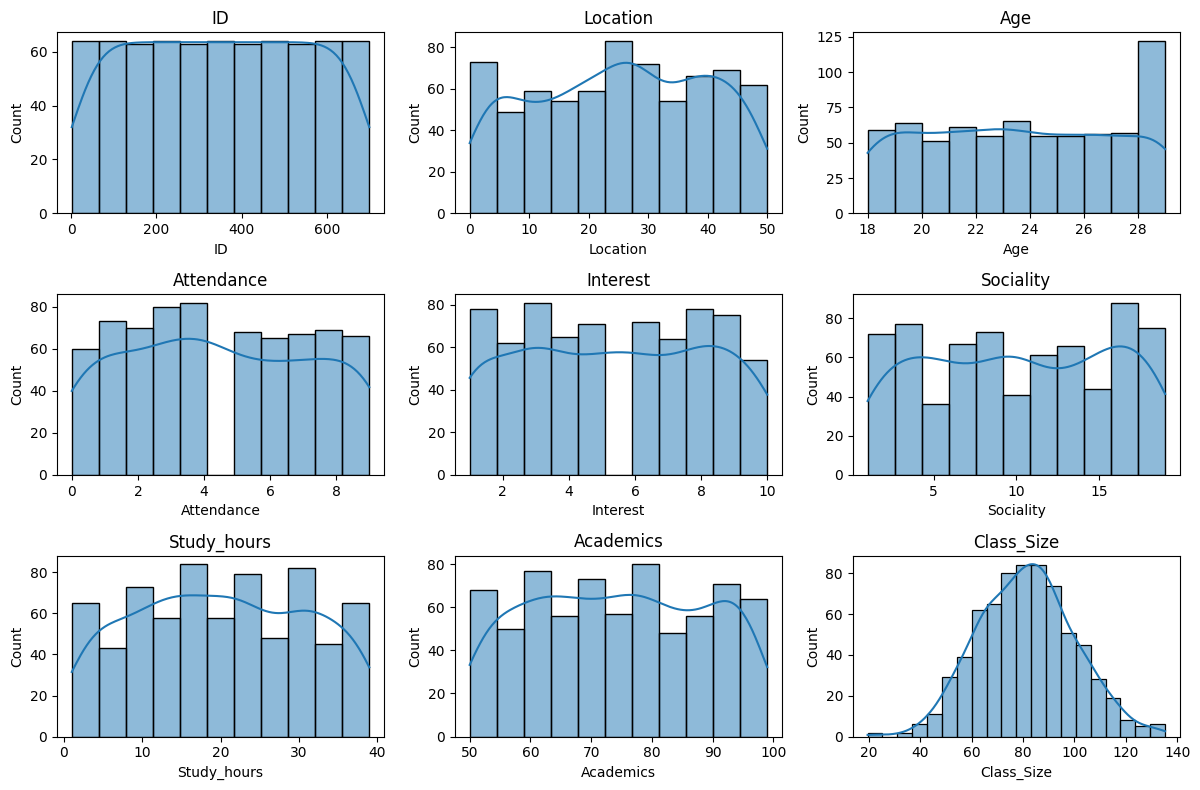

In [21]:
# Plot histograms for numerical variables
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


BAR PLOTS

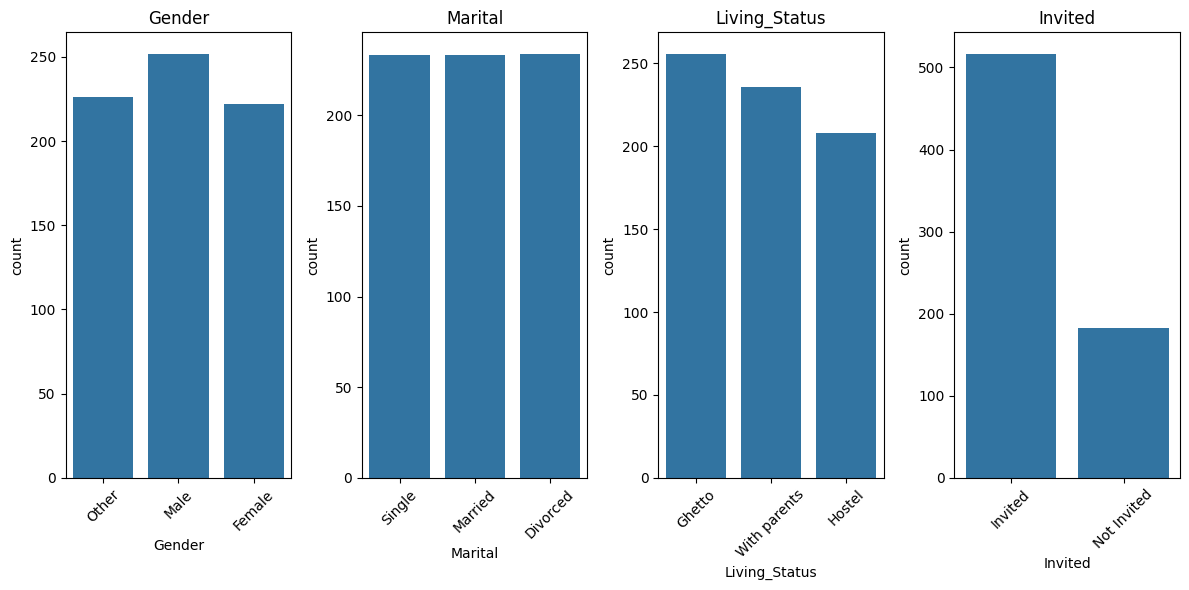

In [23]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 4, i)  # Change to 4 columns
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bivariate Visualization

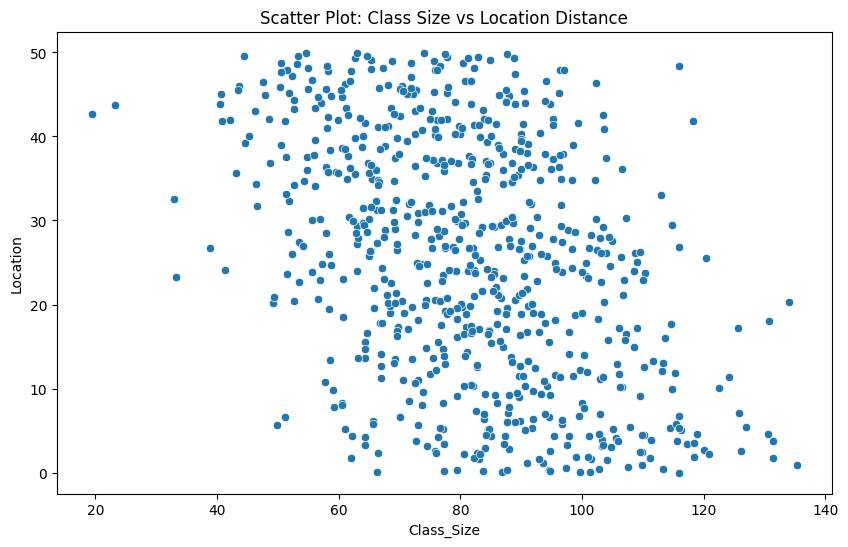

In [25]:
# Scatter plot for numerical variables against 'Class_Size'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Class_Size', y='Location', data=data)
plt.title('Scatter Plot: Class Size vs Location Distance')
plt.show()


Box Plot for Numerical vs Categorical Variables

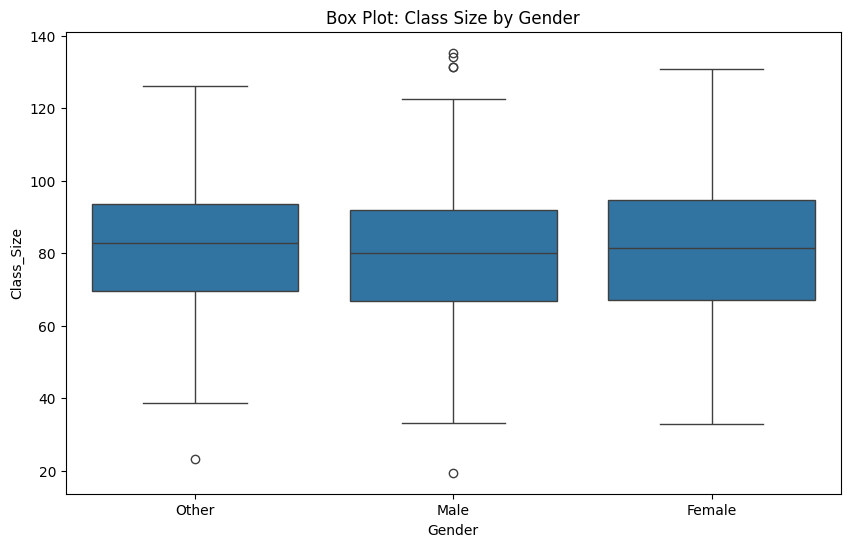

In [29]:
# Box plot for 'Class_Size' vs 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Class_Size', data=data)
plt.title('Box Plot: Class Size by Gender')
plt.show()

CORRELATION ANALYSIS, HEAT MAP

In [ ]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


PAIR PLOT FOR SELECTED VARIABLE

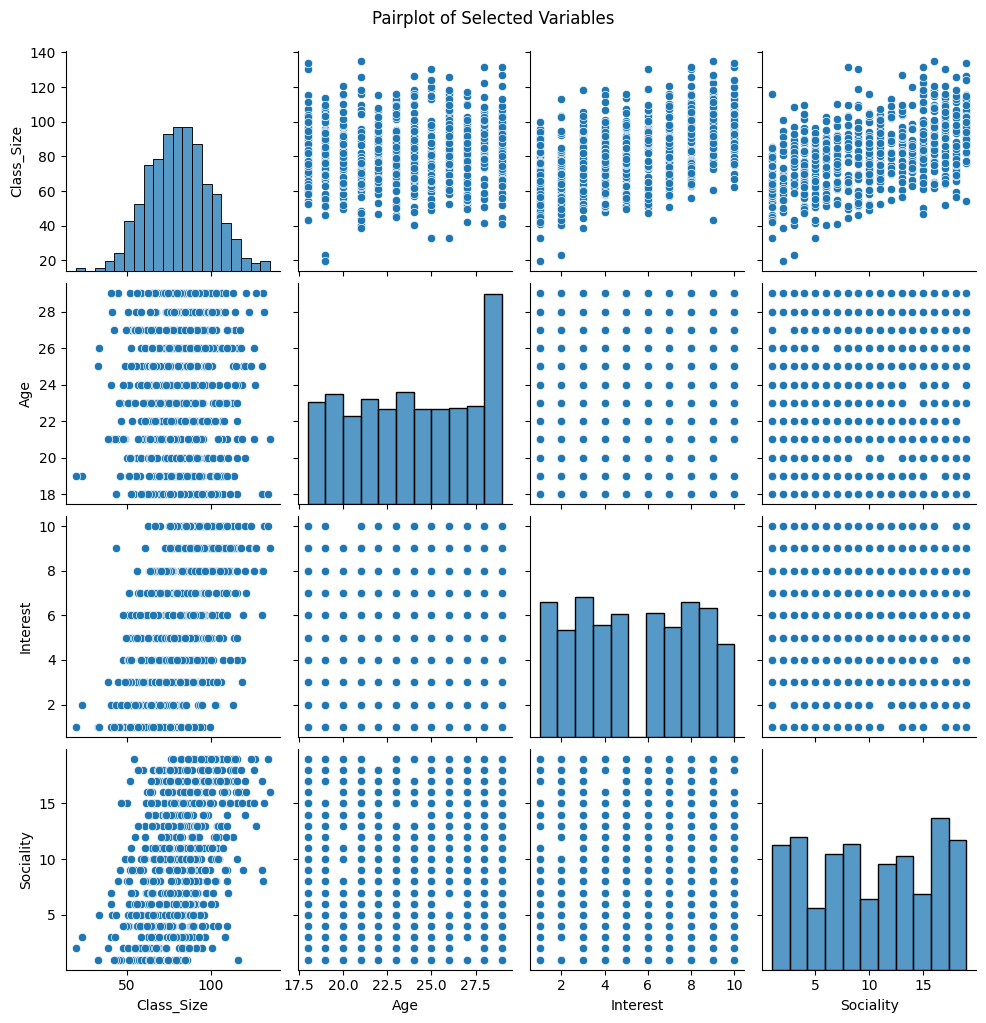

In [32]:
# Select a subset of variables for pairplot
selected_columns = ['Class_Size', 'Age', 'Interest', 'Sociality']

# Pairplot
sns.pairplot(data[selected_columns])
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


VISUALIZATION DESCRIPTION

 Visualizations are essential for exploring and understanding data in a meaningful way. Histograms provide insights into the distribution of numerical variables by displaying the frequency or density of values within bins. They help identify patterns such as skewness or the presence of multiple peaks, aiding in data normalization decisions. Bar plots, on the other hand, depict the frequency of categorical variables, highlighting class imbalances or dominant categories within the dataset.

Scatter plots reveal relationships between two numerical variables by plotting data points on a Cartesian plane. They assist in identifying correlations, clusters, or outliers, offering insights into how variables interact. Box plots compare the distribution of numerical data across different categories of a categorical variable, summarizing central tendency, variability, and potential outliers within each group.

Correlation heatmaps visualize the strength and direction of correlations between numerical variables using color intensity. They help detect relationships and multicollinearity among variables, guiding feature selection for machine learning models. Finally, pairplots display histograms and scatter plots for selected numerical variables, offering a comprehensive view of their distributions and pairwise relationships. These visualizations collectively facilitate exploratory data analysis (EDA), enabling researchers to uncover patterns, trends, and relationships that inform further analysis and decision-making.